# **Flower Image Classification Using CNN**

### This project demonstrates a convolutional neural network (CNN) to classify flower images into five categories. The dataset is divided into training and validation sets, and the model is built using TensorFlow and Keras. We also implement data augmentation techniques to improve generalization.

---

## **Step 1: Import Libraries**
### We begin by importing the necessary Python libraries to build, train, and evaluate our model.

In [25]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, Flatten


## **Step 2: Count Images in Dataset**
### This step counts the total number of images in each subfolder (representing different flower classes) inside the images directory.

In [26]:
count = 0
dirs = os.listdir("images/")  # List all subdirectories (categories)
print(dirs)
for dir in dirs:
    files = os.listdir(path="images/" + dir)  # List all files in each subdirectory
    print(dir + " Folder has " + str(len(files)) + " Images")
    count = count + len(files)  # Accumulate the total image count
print("Total Images = ", count)

['daisy', 'dandelion', 'rose', 'sunflower', 'tulip']
daisy Folder has 764 Images
dandelion Folder has 1052 Images
rose Folder has 784 Images
sunflower Folder has 733 Images
tulip Folder has 984 Images
Total Images =  4317


In [27]:
# Define the base directory and image preprocessing parameters
base_dir = "images/"
img_size = 180  # Define the image size (height, width) for model input
batch = 32  # Define the batch size for training

## **Step 3: Load Dataset and Prepare for Training**
### We load the dataset from the images directory, split it into training and validation sets, and preprocess the images to a uniform size of 180x180 pixels.

In [28]:
# Load and split the dataset: 80% training and 20% validation
train_ds=tf.keras.utils.image_dataset_from_directory(base_dir,
                                                     seed=123,
                                                     validation_split=0.2,
                                                     subset="training",
                                                     image_size=(img_size,img_size),
                                                     batch_size=batch)

Found 4317 files belonging to 5 classes.


Using 3454 files for training.


In [29]:
validation_ds=tf.keras.utils.image_dataset_from_directory(base_dir,
                                                     seed=42,
                                                     validation_split=0.2,
                                                     subset="validation",
                                                     image_size=(img_size,img_size),
                                                     batch_size=batch)

Found 4317 files belonging to 5 classes.
Using 863 files for validation.


In [30]:
# Retrieve the class names (flower categories) from the training dataset
flowers_names=train_ds.class_names
flowers_names

['daisy', 'dandelion', 'rose', 'sunflower', 'tulip']

## **Step 4: Visualize a Batch of Training Images**
### We visualize a batch of 12 images from the training dataset to get a better sense of the dataset.

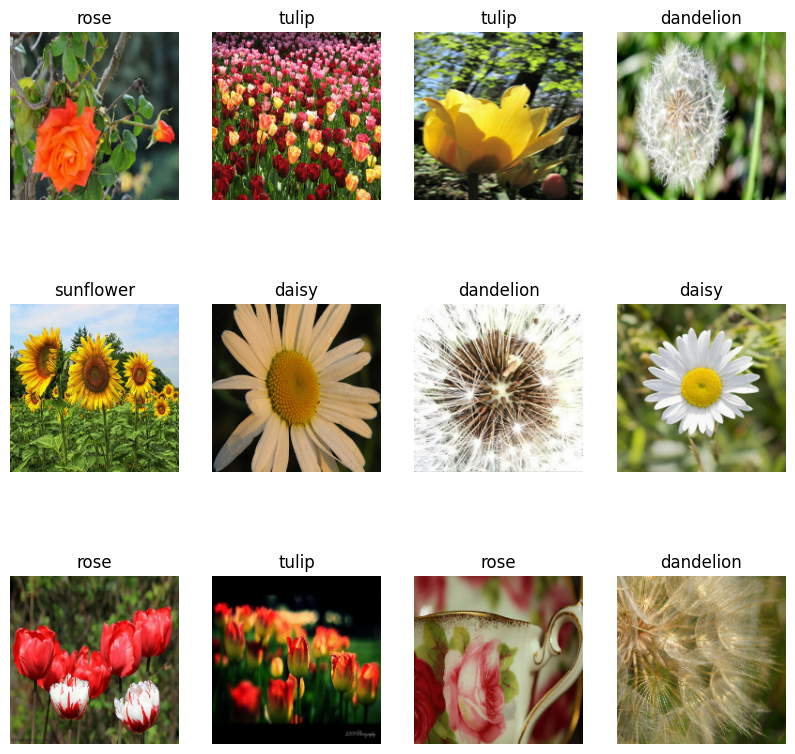

In [31]:
# Visualize a batch of 12 images from the training dataset
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 10))

for images, labels in train_ds.take(1):  # Take one batch of images and labels
    for i in range(12):  # Plot 12 images
        plt.subplot(3, 4, i + 1)  # Create a 3x4 grid of subplots
        plt.imshow(images[i].numpy().astype("uint8"))  # Display the image
        plt.title(flowers_names[labels[i]])  # Show the flower name as title
        plt.axis("off")  # Hide axes


## **Step 5: Optimize Data Loading with Prefetching**
### To improve training performance, we cache the dataset and enable prefetching to overlap data preprocessing and model execution.

In [32]:
# Optimize data pipeline using prefetching and caching to improve performance
AUTOTUNE = tf.data.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)  # Shuffle and prefetch training data
val_ds = validation_ds.cache().prefetch(buffer_size=AUTOTUNE)  # Prefetch validation data

## **Step 6: Apply Data Augmentation**
### Data augmentation helps improve model generalization by applying random transformations such as flipping, rotating, and zooming the images during training.

In [33]:
# **Data Augmentation** to improve generalization by applying random transformations
data_Augmentation = Sequential([
    layers.RandomFlip("horizontal", input_shape=(img_size, img_size, 3)),  # Randomly flip the image horizontally
    layers.RandomRotation(0.1),  # Randomly rotate the image by 10%
    layers.RandomZoom(0.1)  # Randomly zoom the image by 10%
])

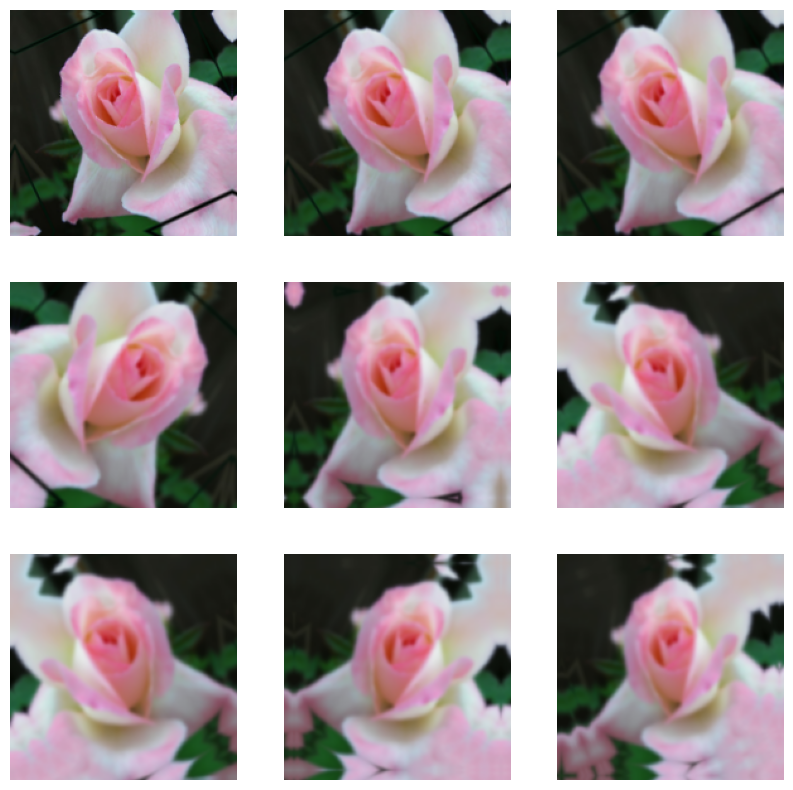

In [34]:
# Visualize some augmented images
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):  # Take one batch of images
    for i in range(9):  # Show 9 augmented images
        images = data_Augmentation(images)  # Apply augmentation
        plt.subplot(3, 3, i + 1)
        plt.imshow(images[0].numpy().astype("uint8"))
        plt.axis("off")

## **Step 7: Build CNN Model**
### We define a convolutional neural network (CNN) with multiple layers for feature extraction, followed by fully connected layers for classification. The model will predict the category of the flower image.

In [46]:
# **Model Creation**
# Define a CNN model using the Sequential API
model = Sequential([
    data_Augmentation,  # Include data augmentation as part of the model
    layers.Rescaling(1./255),  # Rescale pixel values (0-255) to [0,1] range

    # Cv2Donvolutional layers for feature extraction
    Conv2D(16, 3, padding="same", activation="relu"),  # 16 filters, 3x3 kernel, ReLU activation
    MaxPooling2D(),  # Pooling to downsample the feature maps
    Conv2D(32, 3, padding="same", activation="relu"),  # 32 filters
    MaxPooling2D(),    
    Conv2D(64, 3, padding="same", activation="relu"),  # 64 filters
    MaxPooling2D(),

    # Dropout for regularization (prevent overfitting)
    Dropout(0.2),
    Flatten(),  # Flatten the feature maps into a 1D vector

    # Dense layers for classification
    Dense(128, activation="relu"),  # Fully connected layer with 128 units
    Dense(5,activation="softmax")  # Output layer with 5 units (one for each flower category)
])


In [47]:
# Compile the model by specifying the optimizer, loss function, and evaluation metric
model.compile(optimizer="adam",
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),  # Multi-class classification loss
              metrics=["accuracy"])  # Track accuracy during training

## **Step 8: Train the Model**
### We train the model for 10 epochs using the training dataset and validate its performance on the validation dataset.

In [48]:
# Train the model on the training dataset and validate on the validation dataset for 30 epochs
history = model.fit(train_ds, validation_data=val_ds, epochs=30)

Epoch 1/30


108/108 ━━━━━━━━━━━━━━━━━━━━ 66s 543ms/step - accuracy: 0.3082 - loss: 1.6010 - val_accuracy: 0.4658 - val_loss: 1.1972
Epoch 2/30
108/108 ━━━━━━━━━━━━━━━━━━━━ 53s 495ms/step - accuracy: 0.5559 - loss: 1.1077 - val_accuracy: 0.5829 - val_loss: 0.9891
Epoch 3/30
108/108 ━━━━━━━━━━━━━━━━━━━━ 49s 453ms/step - accuracy: 0.6018 - loss: 1.0078 - val_accuracy: 0.6512 - val_loss: 0.8627
Epoch 4/30
108/108 ━━━━━━━━━━━━━━━━━━━━ 50s 467ms/step - accuracy: 0.6456 - loss: 0.8887 - val_accuracy: 0.7022 - val_loss: 0.8074
Epoch 5/30
108/108 ━━━━━━━━━━━━━━━━━━━━ 45s 417ms/step - accuracy: 0.7046 - loss: 0.7864 - val_accuracy: 0.6582 - val_loss: 0.8458
Epoch 6/30
108/108 ━━━━━━━━━━━━━━━━━━━━ 46s 428ms/step - accuracy: 0.6812 - loss: 0.8382 - val_accuracy: 0.6813 - val_loss: 0.8039
Epoch 7/30
108/108 ━━━━━━━━━━━━━━━━━━━━ 56s 515ms/step - accuracy: 0.7091 - loss: 0.7633 - val_accuracy: 0.7462 - val_loss: 0.6495
Epoch 8/30
108/108 ━━━━━━━━━━━━━━━━━━━━ 51s 470ms/step - accuracy: 0.7291 - loss: 0.7025 - val

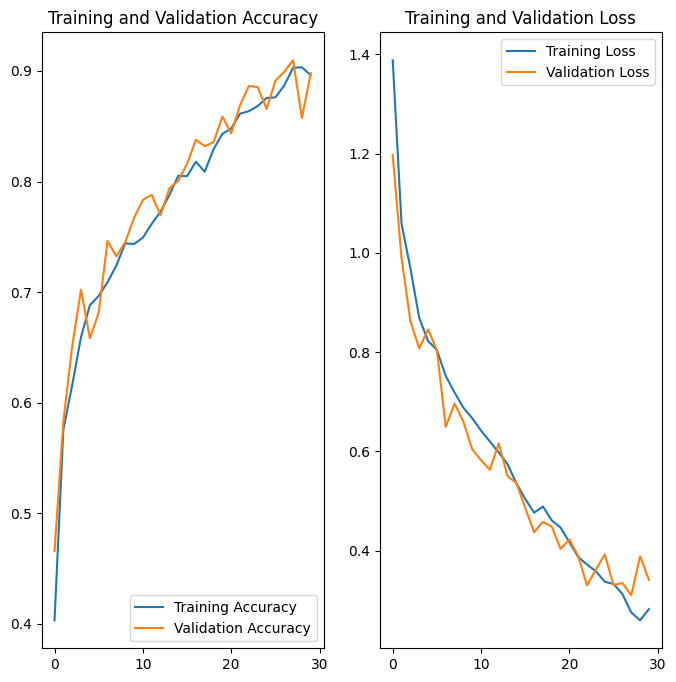

In [49]:
# Plot the training and validation accuracy/loss
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(30)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()


## **Step 9: Model Summary**
### Display a summary of the model's architecture, including the layers and parameters.

In [50]:
model.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential_3 (Sequential)       │ (None, 180, 180, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ rescaling_5 (Rescaling)         │ (None, 180, 180, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_15 (Conv2D)              │ (None, 180, 180, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_14 (MaxPooling2D) │ (None, 90, 90, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_16 (Conv2D)              │ (None, 90, 90, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_15 (MaxPooling2D) │ (None, 45, 45, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_17 (Conv2D)              │ (None, 45, 45, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_16 (MaxPooling2D) │ (None, 22, 22, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 22, 22, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 30976)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 128)            │     3,965,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 5)              │           645 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,967,857 (45.65 MB)

 Trainable params: 3,989,285 (15.22 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 7,978,572 (30.44 MB)

Step 10: Image Classification Function
This function takes an image path as input, preprocesses the image, and uses the trained model to classify it, predicting the flower category.

In [60]:
# **Image Classification Function**
def classify_img(image_path):
    # Load and preprocess the image to match the model's input shape
    input_image = tf.keras.utils.load_img(image_path, target_size=(180, 180))  # Load image with target size
    input_image_array = tf.keras.utils.img_to_array(input_image)  # Convert image to array
    input_image_exp_dim = tf.expand_dims(input_image_array, 0)  
    
    # Make predictions using the trained model
    predictions = model.predict(input_image_exp_dim)
    
    # Find the predicted class with the highest probability
    max_prob = np.argmax(predictions)
    outcome = f"The Image belongs to {flowers_names[max_prob]} with a score of {np.max(predictions) * 100:.2f}%"
    
    return outcome

In [66]:
# Test the classification function on a sample image
classify_img("download.jpeg")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


'The Image belongs to tulip with a score of 99.80%'

Step 11: Save the Model
Finally, we save the trained model for future use or deployment.

In [67]:
# Save the trained model to disk
model.save("Flower_Recognition_Model.keras")

## **Conclusion**
### In this project, we successfully implemented a CNN to classify flower images. We used data augmentation to improve model performance and visualized the dataset during training. The model was saved for later use, and a function was created to classify new images.
___